# Business Understanding

## Project Domain

- Domain: Healthcare & Medical Diagnostics

- Sub-Domain: Smart Diagnostic Systems & Clinical Decision Support

Sistem klasifikasi kanker payudara menggunakan kecerdasan buatan (AI) termasuk dalam bidang smart healthcare, yang memanfaatkan data science dan machine learning untuk membantu tenaga medis dalam mendiagnosis kanker secara cepat dan akurat berdasarkan data histopatologi.

## Problem Statements

- Masalah yang Dihadapi:

1. Diagnosis Manual yang Memakan Waktu
2. Diagnosis kanker payudara biasanya membutuhkan analisis mikroskopik yang rumit dan membutuhkan waktu, terutama di daerah dengan akses terbatas ke fasilitas laboratorium lengkap.

3. Human Error dan Konsistensi Diagnosis
Variasi dalam interpretasi hasil histopatologi antar tenaga medis dapat menyebabkan perbedaan diagnosis, yang berdampak pada efektivitas pengobatan.

4. Keterbatasan Sumber Daya
Tidak semua rumah sakit memiliki dokter spesialis patologi, sehingga diperlukan sistem pendukung keputusan otomatis berbasis data.

5. Kebutuhan Deteksi Dini
Deteksi dini sangat penting untuk meningkatkan tingkat kesembuhan pasien kanker payudara. Sistem prediktif dapat membantu skrining lebih awal dengan akurasi tinggi.

## Goals

Membangun sistem klasifikasi kanker payudara berbasis Artificial Neural Network (ANN) yang mampu membedakan antara tumor jinak (benign) dan ganas (malignant) berdasarkan parameter pengukuran sel histopatologi, seperti:

1. Radius, Texture, Perimeter, Area

2. Smoothness, Compactness, Symmetry, dan fitur statistik lainnya

## Solution Statements

- Model Machine Learning
Menggunakan model Artificial Neural Network (ANN) untuk melakukan klasifikasi diagnosis berdasarkan data fitur statistik sel tumor. Model dilatih untuk mencapai akurasi tinggi (>95%).

- Aplikasi Web (Streamlit)
Membangun antarmuka pengguna yang sederhana untuk memungkinkan input data karakteristik tumor dan memperoleh prediksi instan mengenai jenis tumor.

- Optimasi dengan TensorFlow Lite
Model dikonversi ke format TensorFlow Lite agar dapat dijalankan di perangkat terbatas seperti smartphone atau embedded device untuk aplikasi lapangan.



# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardhaniskandar","key":"d1c029be23e4641b0001d7c96b36854f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0


In [ ]:
!mkdir breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip -d breast-cancer-wisconsin-data
!ls breast-cancer-wisconsin-data

Archive:  breast-cancer-wisconsin-data.zip
  inflating: breast-cancer-wisconsin-data/data.csv  
data.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('breast-cancer-wisconsin-data/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df_encode = pd.DataFrame(df)

## Exploratory Data Analysis

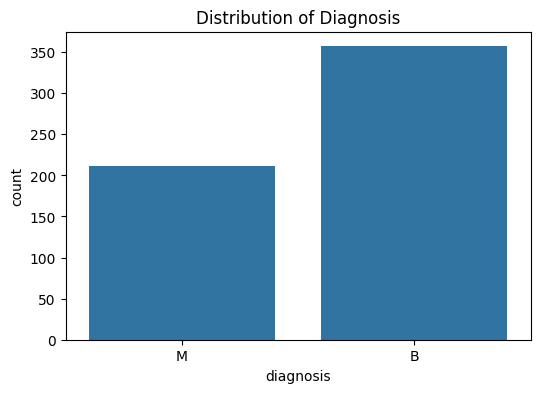

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data= df)
plt.title('Distribution of Diagnosis')
plt.show()

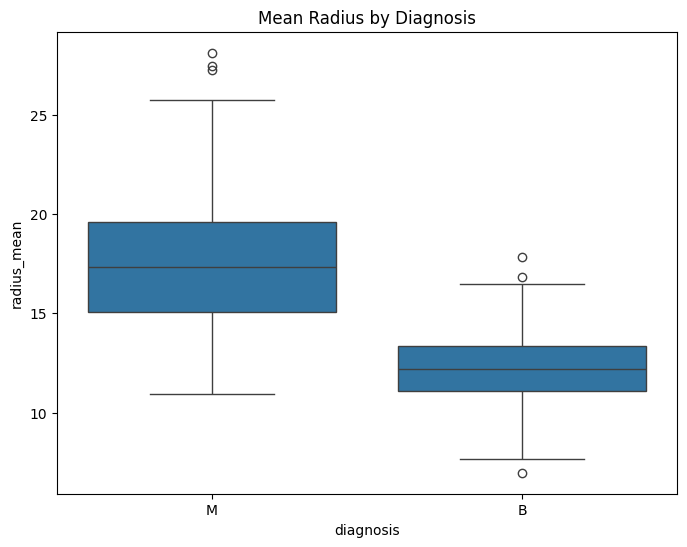

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Mean Radius by Diagnosis')
plt.show()

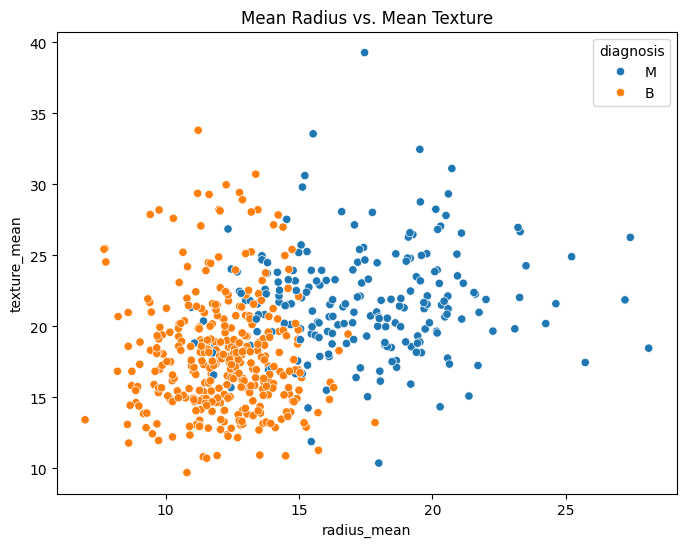

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Mean Radius vs. Mean Texture')
plt.show()

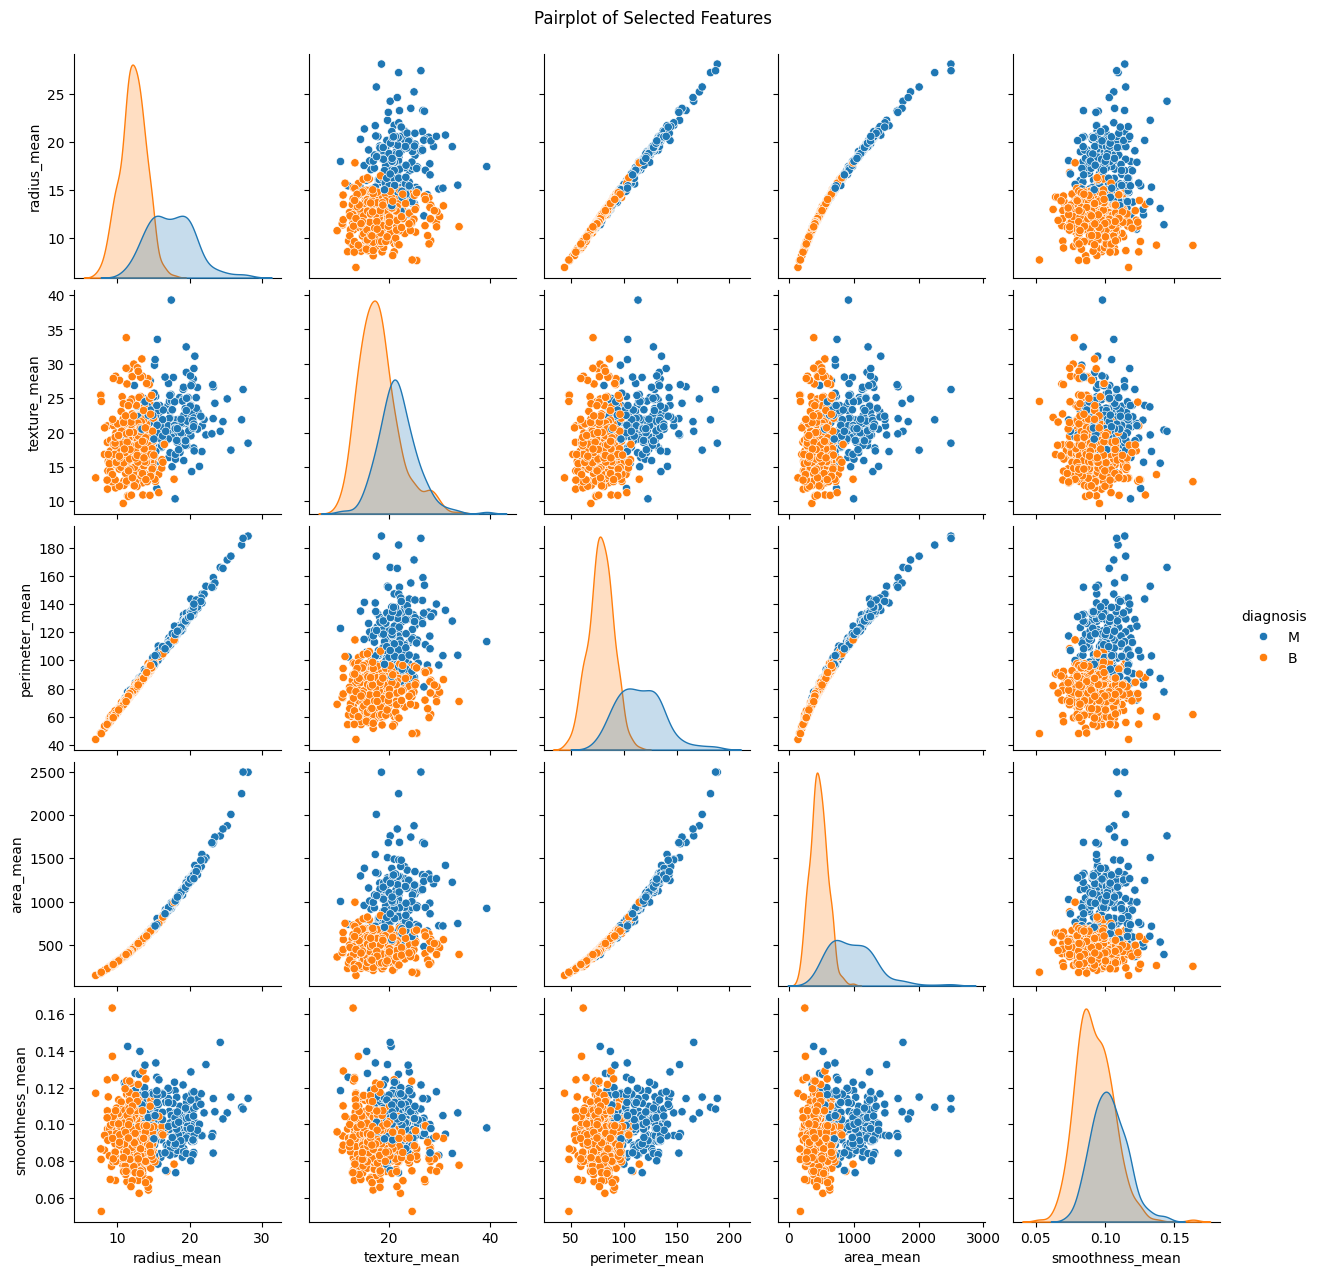

In [ ]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


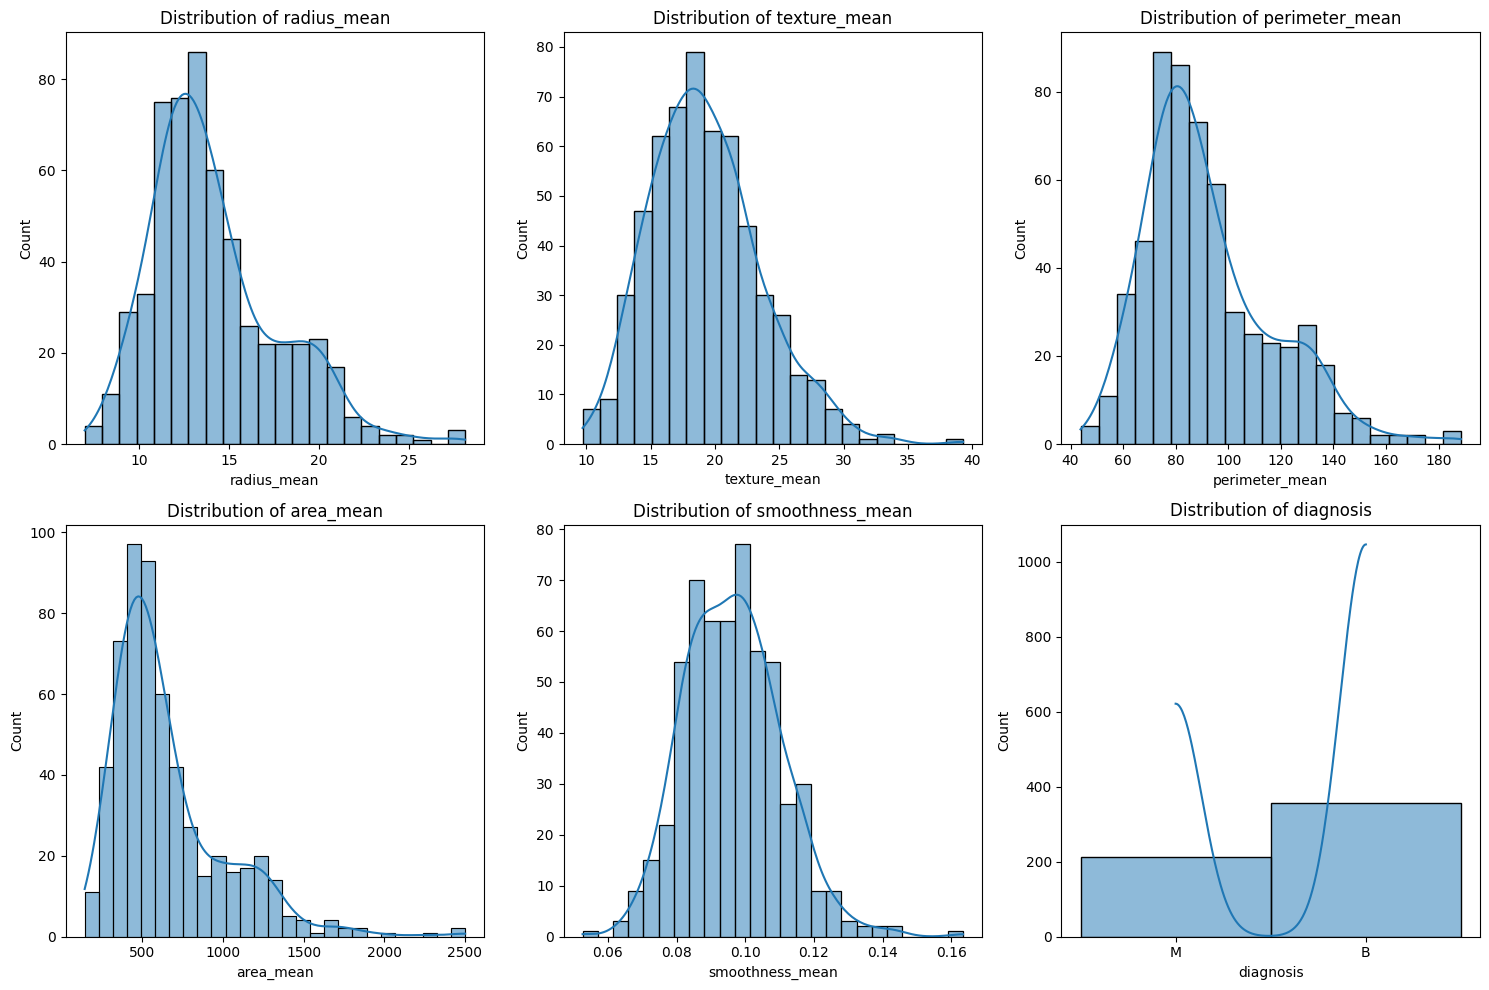

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(selected_features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
for column in df.columns:
    print(f'Max and min values of {column} are:')
    print(f'Max value is {df[column].max()}')
    print(f'Min value is {df[column].min()}')
    print('\n')

Max and min values of diagnosis are:
Max value is M
Min value is B


Max and min values of radius_mean are:
Max value is 28.11
Min value is 6.981


Max and min values of texture_mean are:
Max value is 39.28
Min value is 9.71


Max and min values of perimeter_mean are:
Max value is 188.5
Min value is 43.79


Max and min values of area_mean are:
Max value is 2501.0
Min value is 143.5


Max and min values of smoothness_mean are:
Max value is 0.1634
Min value is 0.05263


Max and min values of compactness_mean are:
Max value is 0.3454
Min value is 0.01938


Max and min values of concavity_mean are:
Max value is 0.4268
Min value is 0.0


Max and min values of concave points_mean are:
Max value is 0.2012
Min value is 0.0


Max and min values of symmetry_mean are:
Max value is 0.304
Min value is 0.106


Max and min values of fractal_dimension_mean are:
Max value is 0.09744
Min value is 0.04996


Max and min values of radius_se are:
Max value is 2.873
Min value is 0.1115


Max and min values o

In [ ]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
scaler=MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
label=LabelEncoder()
y=label.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling

In [ ]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.6398 - loss: 0.6829 - val_accuracy: 0.6374 - val_loss: 0.6507
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6262 - loss: 0.6383 - val_accuracy: 0.6374 - val_loss: 0.6050
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6317 - loss: 0.5917 - val_accuracy: 0.7802 - val_loss: 0.5373
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8086 - loss: 0.4982 - val_accuracy: 0.8462 - val_loss: 0.4517
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8786 - loss: 0.4412 - val_accuracy: 0.8462 - val_loss: 0.3797
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8734 - loss: 0.3362 - val_accuracy: 0.9011 - val_loss: 0.2911
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9162 - loss: 0.2883 - val_accuracy: 0.9011 - val_loss: 0.2321
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9172 - loss: 0.2283 - val_accuracy: 0.9121 - val_los

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9759 - loss: 0.0714
Akurasi Model: 0.9737
Loss Model: 0.0671


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

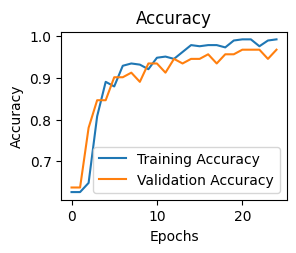

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

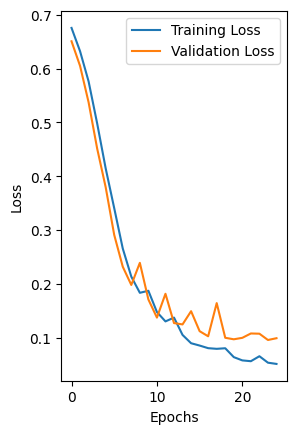

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


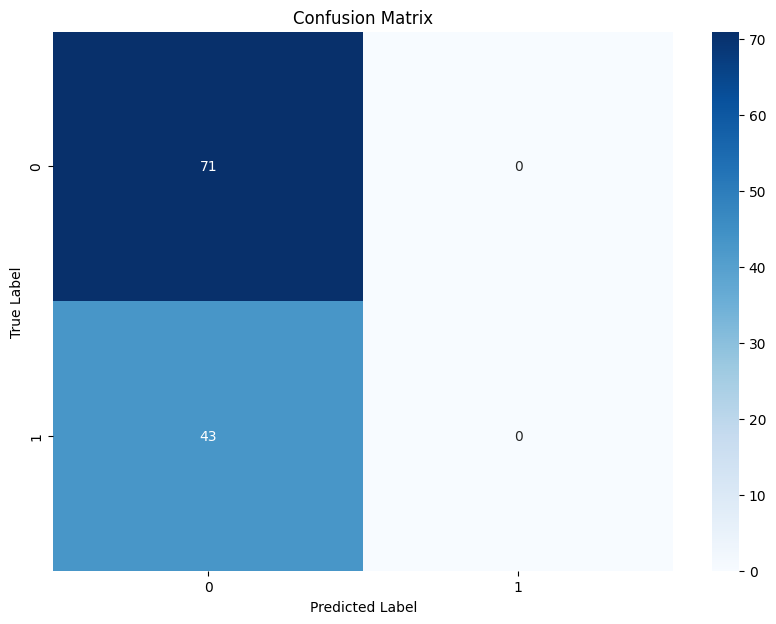

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

In [ ]:
df_encode.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df_encode['diagnosis'] = df_encode['diagnosis'].map({'M':0, 'B':1})

In [ ]:
sample_input = np.array([[1, 1, 183.55, 92.55, 24.33,	4, 1, 183.55, 92.55, 24.33,	4, 1, 183.55, 92.55, 24.33,	4, 1, 183.55, 92.55, 24.33, 4, 1, 183.55, 92.55, 24.33,	4, 1, 183.55, 92.55, 24.33]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = label.inverse_transform([predicted_class])

print(f"Breast Cancer: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Breast Cancer: B


## Model Simulation

## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('cancer_diagnosis.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpu_qx7qxy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134469123085264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134469123080656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134469123080848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134469123091984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134469123081232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134468989273104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134468989272912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134468989273872: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import joblib
joblib.dump(label, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']